<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, 24th October, 2025 (Amsterdam time)</font> 
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  \
Student1 Name: 

Student2 ID: \
Student2 Name: 

Student3 ID: \
Student3 Name: 

( Student4 ID: \
Student4 Name: )

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

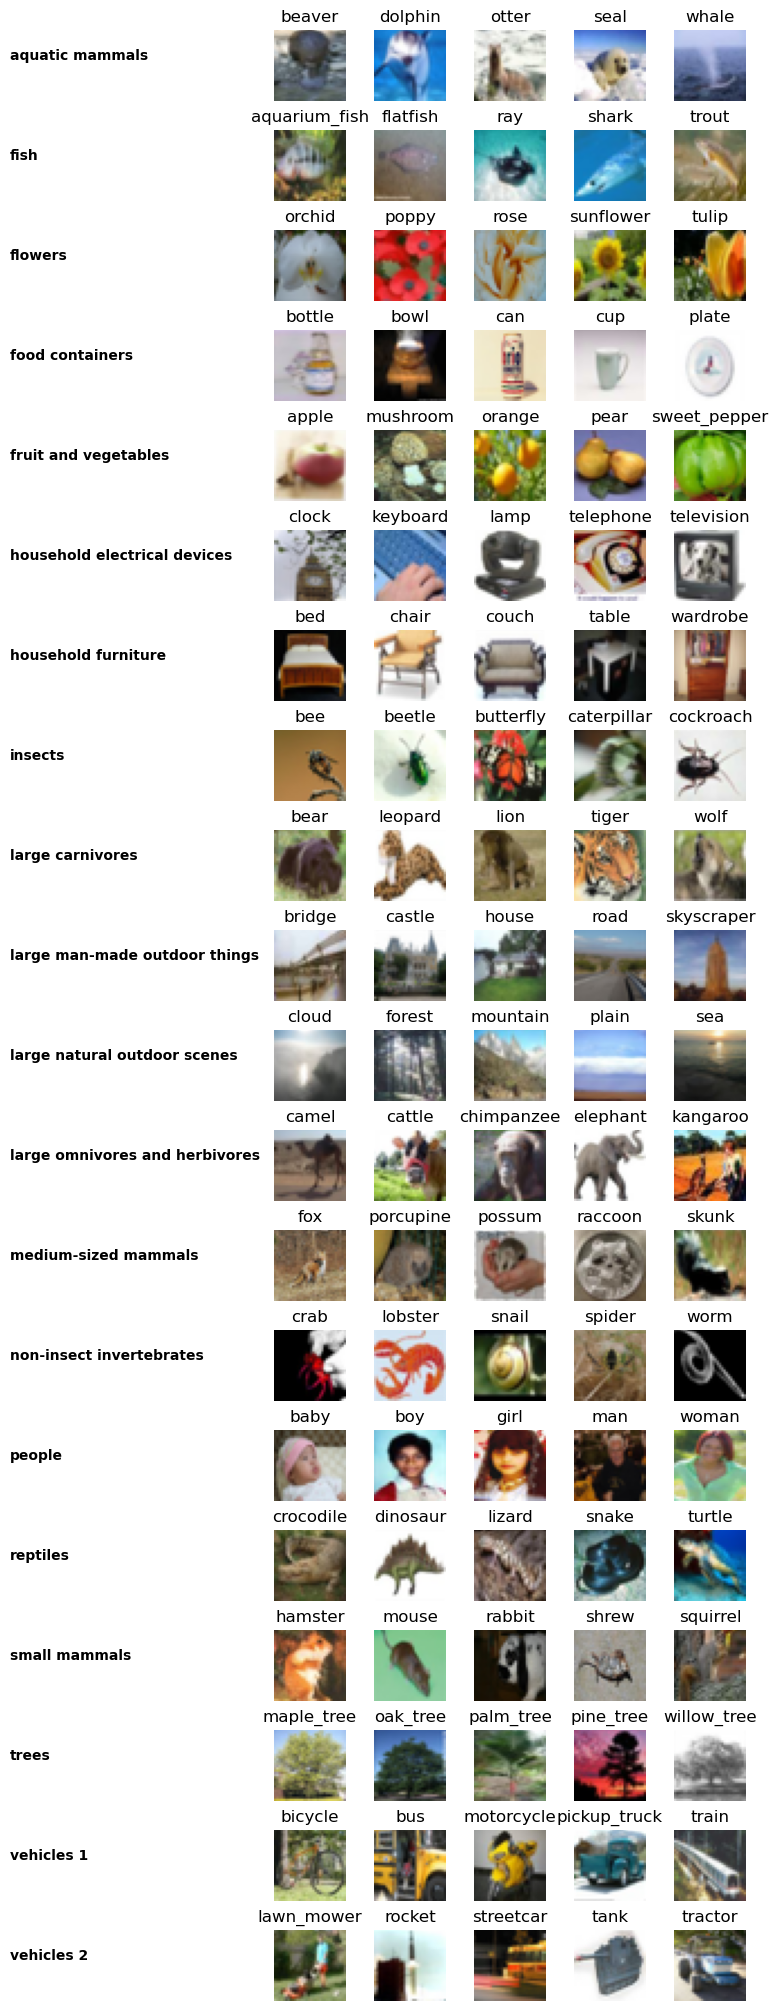

In [2]:
# YOUR CODE HERE

# Fetch the data without the normalization
visual_Set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())

found = [] # List of all subclasses for which we have an image
images = {} # Lookup for the subclass images
idx = 0 # Current index in the visual dataset

# Loop through the data until we have an image for all subclasses
while(len(found) < 100):
    img, target = visual_Set.__getitem__(idx)

    # If this is a new subclass, store it
    if not (target in found):
        found.append(target)
        images[target] = img.permute(1, 2, 0)
    
    idx += 1

# Plot the images
fig, axs = plt.subplots(nrows=len(superclasses), ncols=int(len(classes)/len(superclasses)), figsize=(5,20), constrained_layout=True)
for row, superclass in enumerate(superclasses):

    # Plot all the subclasses
    for column, subclass in enumerate(superclasses[superclass]):
        axs[row, column].axis('off')
        axs[row, column].imshow(images[class_to_idx[subclass]])
        axs[row, column].set_title(subclass)

    # Add superclass name
    heigth = 1.0 - (row + 0.5) / len(superclasses)
    fig.text(-0.5, heigth, superclass, ha='left', va='center', weight='bold')

plt.show()

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [3]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        # YOUR CODE HERE
        super(TwoLayerNet, self).__init__()

        self.flat = nn.Flatten()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x: torch.Tensor):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE

        # Apply the two layers with relu inbetween
        x = self.flat(x)
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.layer2(x)

        return x



<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [4]:
class ConvNet(nn.Module):

    def __init__(self, num_classes):
        '''	
        Initializes the convolutional neural network model.

        Args:
            num_classes (int): The number of classes in the dataset.
        '''

        # YOUR CODE HERE
        super(ConvNet, self).__init__()

        self.layer_C1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5, 5))
        self.layer_S2 = nn.AvgPool2d(kernel_size=(2, 2))
        self.layer_C3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5))
        self.layer_S4 = nn.AvgPool2d(kernel_size=(2, 2))
        self.layer_C5 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5, 5))
        self.flat = nn.Flatten()
        self.layer_F6 = nn.Linear(120, 84)
        self.gaussian_connection = nn.Linear(84, num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE

        # Apply all the layers and the activation functions ("sigmoid squashing function" in the paper)
        x = self.layer_C1(x)
        x = nn.functional.tanh(x) * 1.7159

        x = self.layer_S2(x)

        x = self.layer_C3(x)
        x = nn.functional.tanh(x) * 1.7159

        x = self.layer_S4(x)

        x = self.layer_C5(x)
        x = nn.functional.tanh(x) * 1.7159

        x = self.flat(x)

        x = self.layer_F6(x)
        x = nn.functional.tanh(x)

        x = self.gaussian_connection(x)

        return x


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [5]:
class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
    
        # YOUR CODE HERE
        self.data_set = torchvision.datasets.CIFAR100(root=root, train=train, download=download, transform=transform)

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        # YOUR CODE HERE
        return len(self.data_set)


    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        # YOUR CODE HERE
        return self.data_set[idx]

In [6]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    # YOUR CODE HERE

    # Values for Normalize come from https://gist.github.com/weiaicunzai/e623931921efefd4c331622c344d8151
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))  
    ])

    return transform

In [7]:
def create_optimizer(model, learning_rate=0.001):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    # YOUR CODE HERE

    return torch.optim.Adam(model.parameters(), lr=learning_rate)

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [8]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [9]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [10]:
def train(net, train_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # YOUR CODE HERE

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Print the training device
    print("Training on device", device)

    # Set the model to train mode
    net.to(device)
    net.train()

    # Store the average losses of each epoch
    losses = []
    accuracies = []
    

    # Train the network
    for epoch in range(epochs):

        # Store the total loss and correct predictions for the epoch to track training progress
        total_loss = 0
        correct, total = 0, 0

        for inputs, labels in train_loader:

            # Move data to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            # Determine logits
            outputs = net(inputs)
            
            # Calculate the loss
            loss = criterion(outputs, labels)

            # Back propegate
            loss.backward()

            # Update weigths
            optimizer.step()

            # Remove the gradients for the next iteration
            net.zero_grad()
            optimizer.zero_grad()

            # Update the total loss and the predictions
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Output the average loss and the accuracy of the epoch
        avg_loss = total_loss / len(train_loader)
        accuracy = 100 * correct / total
        losses.append(avg_loss)
        accuracies.append(accuracy)
        print(f"Epoch {epoch} finished with {round(avg_loss, 3)} loss and {round(accuracy, 1)} accuracy.")

    # Plot the learning curve
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=True)
    axs[0].plot(losses, label='Training loss')
    axs[0].set_title('Average loss per epoch versus epoch.')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Average loss')
    axs[0].legend()

    axs[1].plot(accuracies, label='Training accuracy')
    axs[1].set_title('Training accuracy per epoch versus epoch.')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    fig.show()


First, initialize the datasets and data loaders for both models.

In [11]:
# YOUR CODE HERE

# Set the seed for reproducability
torch.manual_seed(0)

# Create the models
TwoLayerNet_model = TwoLayerNet(input_size=3*32*32, hidden_size=256, num_classes=100)
ConvNet_model = ConvNet(num_classes=100)

transform = create_transforms()
optimizer_twolayermodel = create_optimizer(TwoLayerNet_model)
optimizer_convnetmodel = create_optimizer(ConvNet_model)
criterion = torch.nn.CrossEntropyLoss()

train_dataset = CIFAR100_loader('./data', train=True, transform=transform, download=True)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)

Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

Training on device cuda
Epoch 0 finished with 3.832 loss and 13.8 accuracy.
Epoch 1 finished with 3.375 loss and 21.1 accuracy.
Epoch 2 finished with 3.165 loss and 24.8 accuracy.
Epoch 3 finished with 3.017 loss and 27.6 accuracy.
Epoch 4 finished with 2.896 loss and 29.9 accuracy.
Epoch 5 finished with 2.78 loss and 32.2 accuracy.
Epoch 6 finished with 2.674 loss and 34.3 accuracy.
Epoch 7 finished with 2.576 loss and 36.6 accuracy.
Epoch 8 finished with 2.489 loss and 38.0 accuracy.
Epoch 9 finished with 2.393 loss and 40.2 accuracy.
Epoch 10 finished with 2.317 loss and 41.5 accuracy.
Epoch 11 finished with 2.231 loss and 43.5 accuracy.
Epoch 12 finished with 2.165 loss and 45.1 accuracy.
Epoch 13 finished with 2.103 loss and 46.3 accuracy.
Epoch 14 finished with 2.042 loss and 47.6 accuracy.
Epoch 15 finished with 1.973 loss and 49.1 accuracy.
Epoch 16 finished with 1.908 loss and 50.4 accuracy.
Epoch 17 finished with 1.862 loss and 51.5 accuracy.
Epoch 18 finished with 1.802 loss

C:\Users\thijs\AppData\Local\Temp\ipykernel_16656\1193613574.py:87: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


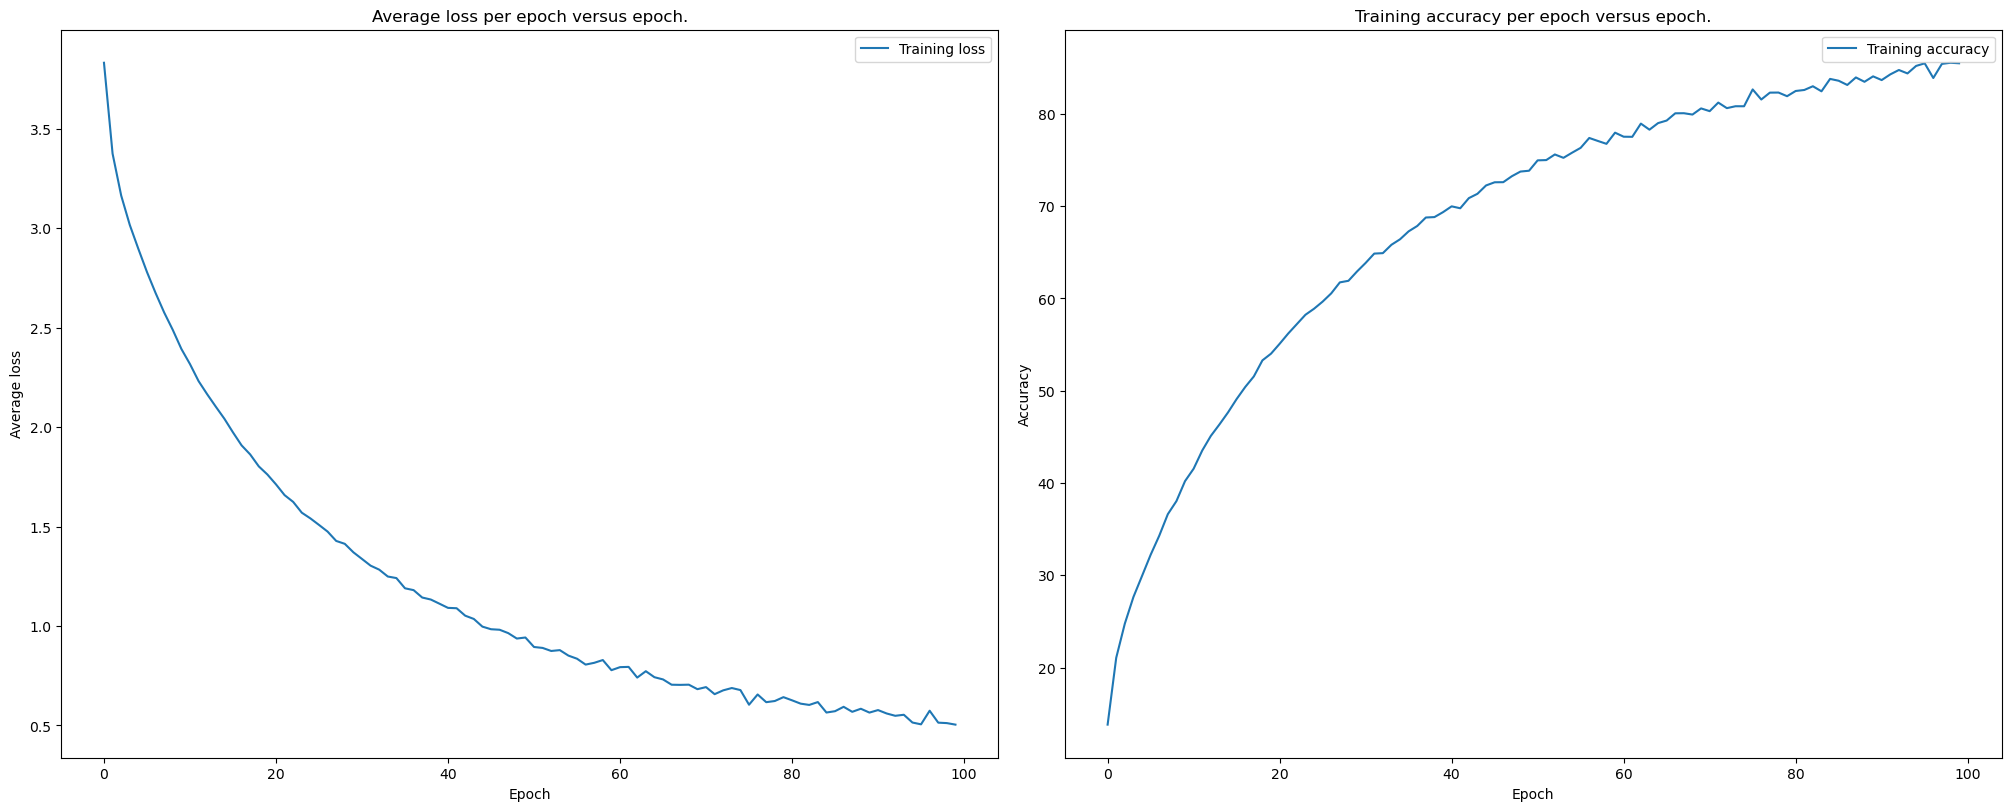

In [12]:
# YOUR CODE HERE

train(TwoLayerNet_model, train_dataloader, criterion, optimizer_twolayermodel)

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

Training on device cuda
Epoch 0 finished with 3.918 loss and 11.6 accuracy.
Epoch 1 finished with 3.524 loss and 17.7 accuracy.
Epoch 2 finished with 3.355 loss and 20.3 accuracy.
Epoch 3 finished with 3.24 loss and 22.3 accuracy.
Epoch 4 finished with 3.146 loss and 23.8 accuracy.
Epoch 5 finished with 3.068 loss and 25.4 accuracy.
Epoch 6 finished with 3.005 loss and 26.4 accuracy.
Epoch 7 finished with 2.939 loss and 27.7 accuracy.
Epoch 8 finished with 2.886 loss and 28.8 accuracy.
Epoch 9 finished with 2.834 loss and 29.8 accuracy.
Epoch 10 finished with 2.793 loss and 30.5 accuracy.
Epoch 11 finished with 2.744 loss and 31.7 accuracy.
Epoch 12 finished with 2.706 loss and 32.3 accuracy.
Epoch 13 finished with 2.667 loss and 33.2 accuracy.
Epoch 14 finished with 2.634 loss and 33.8 accuracy.
Epoch 15 finished with 2.597 loss and 34.6 accuracy.
Epoch 16 finished with 2.57 loss and 34.9 accuracy.
Epoch 17 finished with 2.541 loss and 35.5 accuracy.
Epoch 18 finished with 2.508 loss 

C:\Users\thijs\AppData\Local\Temp\ipykernel_16656\1193613574.py:87: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


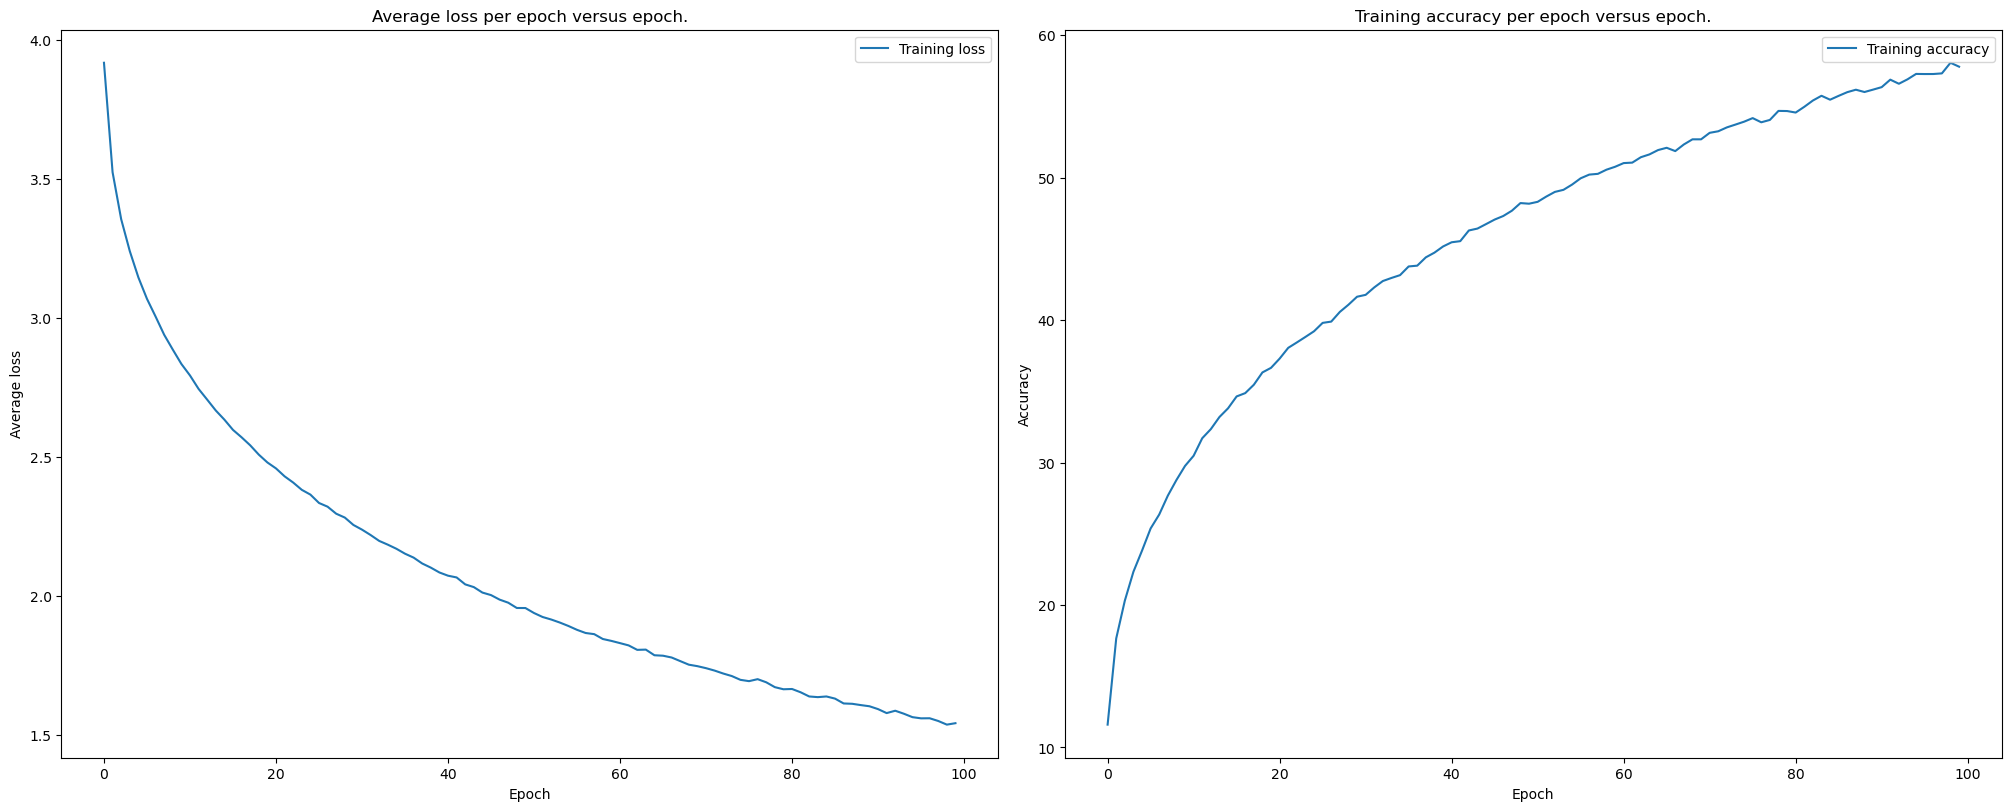

In [13]:
# YOUR CODE HERE

train(ConvNet_model, train_dataloader, criterion, optimizer_convnetmodel)

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [34]:
# YOUR CODE HERE
import optuna

# Modified TwoLayerNet architecture
class Modified_TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes, dropout=0.5):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        # YOUR CODE HERE
        super(Modified_TwoLayerNet, self).__init__()

        # The modification is to add two additional linear layers and dropout/batchnorm layers

        self.flat = nn.Flatten()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)
        self.dropout1 = nn.Dropout1d(p=dropout)

        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout1d(p=dropout)

        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.batchnorm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout1d(p=dropout)

        self.layer4 = nn.Linear(hidden_size, num_classes)

    def forward(self, x: torch.Tensor):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE

        # Apply the two layers with relu inbetween
        x = self.flat(x)

        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = nn.functional.relu(x)
        x = self.dropout1(x)

        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)

        x = self.layer3(x)
        x = self.batchnorm3(x)
        x = nn.functional.relu(x)
        x = self.dropout3(x)

        x = self.layer4(x)

        return x

# Modified ConvNet architecture
class Modified_ConvNet(nn.Module):

    def __init__(self, num_classes, dropout=0.5):
        '''	
        Initializes the convolutional neural network model.

        Args:
            num_classes (int): The number of classes in the dataset.
        '''

        # YOUR CODE HERE
        super(Modified_ConvNet, self).__init__()

        self.layer_C1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5, 5))
        self.batchnorm1 = nn.BatchNorm2d(6)
        self.dropout1 = nn.Dropout2d(dropout)

        self.layer_S2 = nn.AvgPool2d(kernel_size=(2, 2))

        self.layer_C3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5))
        self.batchnorm3 = nn.BatchNorm2d(16)
        self.dropout3 = nn.Dropout2d(dropout)

        self.layer_S4 = nn.AvgPool2d(kernel_size=(2, 2))

        self.layer_C5 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5, 5))
        self.batchnorm5 = nn.BatchNorm2d(120)
        self.dropout5 = nn.Dropout2d(dropout)

        self.flat = nn.Flatten()
        self.layer_F6 = nn.Linear(120, 84)
        self.layer_F7 = nn.Linear(84, 84)
        self.layer_F8 = nn.Linear(84, 84)

        self.gaussian_connection = nn.Linear(84, num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE

        # Apply all the layers and the activation functions ("sigmoid squashing function" in the paper)
        x = self.layer_C1(x)
        x = self.batchnorm1(x)
        x = nn.functional.tanh(x) * 1.7159
        x = self.dropout1(x)

        x = self.layer_S2(x)

        x = self.layer_C3(x)
        x = self.batchnorm3(x)
        x = nn.functional.tanh(x) * 1.7159
        x = self.dropout3(x)

        x = self.layer_S4(x)

        x = self.layer_C5(x)
        x = self.batchnorm5(x)
        x = nn.functional.tanh(x) * 1.7159
        x = self.dropout5(x)

        x = self.flat(x)

        x = self.layer_F6(x)
        x = nn.functional.tanh(x) * 1.7159

        x = self.layer_F7(x)
        x = nn.functional.tanh(x) * 1.7159

        x = self.layer_F8(x)
        x = nn.functional.tanh(x) * 1.7159
        
        x = self.gaussian_connection(x)

        return x

def Modified_validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    criterion = nn.CrossEntropyLoss()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0
    total_loss = 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            total_loss += criterion(outputs, labels).item()

    accuracy = 100 * correct / total

    return total_loss / len(testloader), accuracy

# Modified training loop. Removes the printing of the loss and accuracy
def Modified_train(net, train_loader, criterion, optimizer, epochs=100, test = False, test_loader = None):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        tuple(list, list): The losses and accuracies for the epochs.
    '''

    # YOUR CODE HERE

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set the model to train mode
    net.to(device)
    net.train()

    # Store the average losses of each epoch
    losses = []
    accuracies = []

    test_losses = []
    test_accuracies = []

    # Train the network
    for epoch in range(epochs):

        # Store the total loss and correct predictions for the epoch to track training progress
        total_loss = 0
        correct, total = 0, 0

        net.train()
        for inputs, labels in train_loader:

            # Move data to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            # Determine logits
            outputs = net(inputs)
            
            # Calculate the loss
            loss = criterion(outputs, labels)

            # Back propegate
            loss.backward()

            # Update weigths
            optimizer.step()

            # Remove the gradients for the next iteration
            net.zero_grad()
            optimizer.zero_grad()

            # Update the total loss and the predictions
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Store the average loss and the accuracy of the epoch
        avg_loss = total_loss / len(train_loader)
        accuracy = 100 * correct / total
        losses.append(avg_loss)
        accuracies.append(accuracy)

        # Track the loss and accuracy every 5 epochs on the test set
        if test and epoch % 5 == 0:
            test_loss, test_acc = Modified_validate(net , test_loader)
            test_losses.append(test_loss)
            test_accuracies.append(test_acc)

    return losses, accuracies, test_losses, test_accuracies

proposal_transforms = {'easy_transform': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))  
    ]),
    'crop_transform':
    transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))  
    ])}

# Define an objective function for HPO on TwoLayerNet
def objective_TwoLayerNet(trial):

    # Set seed, device and criterion
    torch.manual_seed(0)
    criterion = torch.nn.CrossEntropyLoss()

    # Get a value for all the hyper parameters
    lr = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
    weight_decay = trial.suggest_categorical("decay", [0.0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
    transform = trial.suggest_categorical("transform", proposal_transforms)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128, 256, 512, 1024])
    dropout = trial.suggest_float("dropout", 0.0, 1.0)
    hidden_size = trial.suggest_categorical("hidden_size", [32, 64, 128, 256])

    # Create the model and optimizer
    model = Modified_TwoLayerNet(input_size=3*32*32, hidden_size=hidden_size, num_classes=100, dropout=dropout)
    optim = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Create the validation dataset
    train_dataset = CIFAR100_loader('./data', train=True, transform=proposal_transforms[transform], download=True)
    test_dataset = CIFAR100_loader('./data', train=True, transform=create_transforms(), download=True)
    validate_indices = list(range(len(train_dataset)-5000, len(train_dataset)))

    # Extract the validation set
    train_dataset = torch.utils.data.Subset(train_dataset, validate_indices)
    test_dataset = torch.utils.data.Subset(test_dataset, validate_indices)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, shuffle=False)

    train_loss, train_acc, _, _ = Modified_train(model, train_dataloader, criterion, optim, epochs=25)

    accuracy = validate(model, test_dataloader)

    # Return the accuracy we wish to optimize
    return accuracy

# Define an objective function for HPO on ConvNet
def objective_ConvNet(trial):
    
    # Set seed, device and criterion
    torch.manual_seed(0)
    criterion = torch.nn.CrossEntropyLoss()

    # Get a value for all the hyper parameters
    lr = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
    weight_decay = trial.suggest_categorical("decay", [0.0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
    transform = trial.suggest_categorical("transform", proposal_transforms)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128, 256, 512, 1024])
    dropout = trial.suggest_float("dropout", 0.0, 1.0)

    # Create the model and optimizer
    model = Modified_ConvNet(num_classes=100, dropout=dropout)
    optim = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Create the validation dataset
    train_dataset = CIFAR100_loader('./data', train=True, transform=proposal_transforms[transform], download=True)
    test_dataset = CIFAR100_loader('./data', train=True, transform=create_transforms(), download=True)
    validate_indices = list(range(len(train_dataset)-5000, len(train_dataset)))

    # Extract the validation set
    train_dataset = torch.utils.data.Subset(train_dataset, validate_indices)
    test_dataset = torch.utils.data.Subset(test_dataset, validate_indices)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, shuffle=False)

    train_loss, train_acc, _, _ = Modified_train(model, train_dataloader, criterion, optim, epochs=25)

    accuracy = validate(model, test_dataloader)

    # Return the accuracy we wish to optimize
    return accuracy


In [ ]:
# Perform the study on TwoLayerNet and save the results
study_TwoLayerNet = optuna.create_study(study_name='HPO TwoLayerNet', direction="maximize")
study_TwoLayerNet.optimize(objective_TwoLayerNet, n_trials=150)
study_TwoLayerNet.trials_dataframe().to_csv('studies/TwoLayerNet.csv')
with open('studies/TwoLayerNet_BestParams.txt', 'w') as f:
    f.write(study_TwoLayerNet.best_trial.params.__str__())

# Perform the study on ConvNet and save the results
study_ConvNet = optuna.create_study(study_name='HPO ConvNet', direction="maximize")
study_ConvNet.optimize(objective_ConvNet, n_trials=150)
study_ConvNet.trials_dataframe().to_csv('studies/ConvNet.csv')
with open('studies/ConvNet_BestParams.txt', 'w') as f:
    f.write(study_ConvNet.best_trial.params.__str__())



[I 2025-10-23 23:16:16,749] A new study created in memory with name: HPO TwoLayerNet
[I 2025-10-23 23:16:55,846] Trial 0 finished with value: 1.32 and parameters: {'lr': 0.00018278410427529146, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.7870753657019607, 'hidden_size': 32}. Best is trial 0 with value: 1.32.


Accuracy of the network on the test images: 1.32 %


[I 2025-10-23 23:17:50,240] Trial 1 finished with value: 1.1 and parameters: {'lr': 6.248971929543194e-05, 'decay': 0.001, 'transform': 'crop_transform', 'batch_size': 1024, 'dropout': 0.9922396191881551, 'hidden_size': 128}. Best is trial 0 with value: 1.32.


Accuracy of the network on the test images: 1.10 %


[I 2025-10-23 23:18:49,586] Trial 2 finished with value: 1.46 and parameters: {'lr': 5.9710048108912114e-05, 'decay': 0.0001, 'transform': 'crop_transform', 'batch_size': 128, 'dropout': 0.7358569549555511, 'hidden_size': 64}. Best is trial 2 with value: 1.46.


Accuracy of the network on the test images: 1.46 %


[I 2025-10-23 23:19:47,467] Trial 3 finished with value: 3.72 and parameters: {'lr': 2.141085794585394e-05, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.36152684853257744, 'hidden_size': 128}. Best is trial 3 with value: 3.72.


Accuracy of the network on the test images: 3.72 %


[I 2025-10-23 23:20:43,279] Trial 4 finished with value: 2.34 and parameters: {'lr': 0.0001877259002149764, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.7062435551745369, 'hidden_size': 256}. Best is trial 3 with value: 3.72.


Accuracy of the network on the test images: 2.34 %


[I 2025-10-23 23:21:38,380] Trial 5 finished with value: 1.2 and parameters: {'lr': 0.00014686819080311794, 'decay': 0.0001, 'transform': 'crop_transform', 'batch_size': 128, 'dropout': 0.9596689414346544, 'hidden_size': 64}. Best is trial 3 with value: 3.72.


Accuracy of the network on the test images: 1.20 %


[I 2025-10-23 23:22:31,250] Trial 6 finished with value: 11.34 and parameters: {'lr': 0.0005015660303597794, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.4644717453918804, 'hidden_size': 256}. Best is trial 6 with value: 11.34.


Accuracy of the network on the test images: 11.34 %


[I 2025-10-23 23:23:51,545] Trial 7 finished with value: 12.82 and parameters: {'lr': 0.00011887284473862136, 'decay': 1e-06, 'transform': 'crop_transform', 'batch_size': 256, 'dropout': 0.412071670345617, 'hidden_size': 256}. Best is trial 7 with value: 12.82.


Accuracy of the network on the test images: 12.82 %


[I 2025-10-23 23:24:43,474] Trial 8 finished with value: 7.92 and parameters: {'lr': 0.0001403414314934337, 'decay': 1e-08, 'transform': 'crop_transform', 'batch_size': 1024, 'dropout': 0.3730422684146314, 'hidden_size': 128}. Best is trial 7 with value: 12.82.


Accuracy of the network on the test images: 7.92 %


[I 2025-10-23 23:25:35,831] Trial 9 finished with value: 11.0 and parameters: {'lr': 0.0009141464631390394, 'decay': 0.0, 'transform': 'crop_transform', 'batch_size': 256, 'dropout': 0.2755926142307622, 'hidden_size': 32}. Best is trial 7 with value: 12.82.


Accuracy of the network on the test images: 11.00 %


[I 2025-10-23 23:26:24,275] Trial 10 finished with value: 49.48 and parameters: {'lr': 1.8086643273056447e-05, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.09897987982392187, 'hidden_size': 256}. Best is trial 10 with value: 49.48.


Accuracy of the network on the test images: 49.48 %


[I 2025-10-23 23:27:12,594] Trial 11 finished with value: 46.32 and parameters: {'lr': 1.451233717094915e-05, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.050751176816696705, 'hidden_size': 256}. Best is trial 10 with value: 49.48.


Accuracy of the network on the test images: 46.32 %


[I 2025-10-23 23:28:01,219] Trial 12 finished with value: 38.24 and parameters: {'lr': 1.0553064920842106e-05, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.05123459701854028, 'hidden_size': 256}. Best is trial 10 with value: 49.48.


Accuracy of the network on the test images: 38.24 %


[I 2025-10-23 23:28:50,257] Trial 13 finished with value: 58.34 and parameters: {'lr': 2.1844999547465443e-05, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.02230559432153437, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 58.34 %


[I 2025-10-23 23:29:39,782] Trial 14 finished with value: 51.58 and parameters: {'lr': 2.6447141925517372e-05, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.20096220491157402, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 51.58 %


[I 2025-10-23 23:30:28,615] Trial 15 finished with value: 52.68 and parameters: {'lr': 3.421267579354707e-05, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.19619726299514545, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 52.68 %


[I 2025-10-23 23:31:13,793] Trial 16 finished with value: 54.44 and parameters: {'lr': 3.458171830198891e-05, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.1960632853258603, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 54.44 %


[I 2025-10-23 23:31:55,152] Trial 17 finished with value: 10.42 and parameters: {'lr': 4.472518946539969e-05, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.1778722561756782, 'hidden_size': 32}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 10.42 %


[I 2025-10-23 23:32:35,342] Trial 18 finished with value: 5.22 and parameters: {'lr': 6.081320746310542e-05, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.5351724938570299, 'hidden_size': 64}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 5.22 %


[I 2025-10-23 23:33:21,204] Trial 19 finished with value: 34.26 and parameters: {'lr': 1.0912292214093922e-05, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.012701694554728915, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 34.26 %


[I 2025-10-23 23:34:14,572] Trial 20 finished with value: 12.66 and parameters: {'lr': 3.232843890121037e-05, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.5502552882169127, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 12.66 %


[I 2025-10-23 23:34:59,759] Trial 21 finished with value: 57.4 and parameters: {'lr': 3.456728247911851e-05, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.15495185263862965, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 57.40 %


[I 2025-10-23 23:35:46,794] Trial 22 finished with value: 57.16 and parameters: {'lr': 7.991692254990688e-05, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.2796571023034373, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 57.16 %


[I 2025-10-23 23:36:31,549] Trial 23 finished with value: 56.98 and parameters: {'lr': 9.0892288636013e-05, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.2918709612603214, 'hidden_size': 256}. Best is trial 13 with value: 58.34.


Accuracy of the network on the test images: 56.98 %


[I 2025-10-23 23:37:16,302] Trial 24 finished with value: 79.2 and parameters: {'lr': 8.055770384157679e-05, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.1085802860109025, 'hidden_size': 256}. Best is trial 24 with value: 79.2.


Accuracy of the network on the test images: 79.20 %


[I 2025-10-23 23:38:01,124] Trial 25 finished with value: 91.12 and parameters: {'lr': 0.0003523948129398122, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.1325918052932159, 'hidden_size': 256}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 91.12 %


[I 2025-10-23 23:38:32,750] Trial 26 finished with value: 34.34 and parameters: {'lr': 0.000342622013413921, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.0016300767727242954, 'hidden_size': 64}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 34.34 %


[I 2025-10-23 23:39:02,964] Trial 27 finished with value: 17.26 and parameters: {'lr': 0.000337451828667792, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.1036373303689589, 'hidden_size': 32}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 17.26 %


[I 2025-10-23 23:39:53,178] Trial 28 finished with value: 69.54 and parameters: {'lr': 0.0002693799839250624, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.11389430042242468, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 69.54 %


[I 2025-10-23 23:40:26,035] Trial 29 finished with value: 7.16 and parameters: {'lr': 0.00023272997841031779, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.6147107637518138, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 7.16 %


[I 2025-10-23 23:41:11,076] Trial 30 finished with value: 78.54 and parameters: {'lr': 0.0006934718436987743, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.1193408870859668, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 78.54 %


[I 2025-10-23 23:41:56,184] Trial 31 finished with value: 80.38 and parameters: {'lr': 0.0008596690296772754, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.1140933140144103, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 80.38 %


[I 2025-10-23 23:42:41,238] Trial 32 finished with value: 51.88 and parameters: {'lr': 0.0008459057838788251, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.24873914432544597, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 51.88 %


[I 2025-10-23 23:43:26,560] Trial 33 finished with value: 78.1 and parameters: {'lr': 0.0005841189502254507, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.12156587747620731, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 78.10 %


[I 2025-10-23 23:44:11,548] Trial 34 finished with value: 33.36 and parameters: {'lr': 0.0006140162979177691, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.3523637603371629, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 33.36 %


[I 2025-10-23 23:44:56,531] Trial 35 finished with value: 1.56 and parameters: {'lr': 0.00043739269401753023, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.8963498144569155, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 1.56 %


[I 2025-10-23 23:45:33,833] Trial 36 finished with value: 48.78 and parameters: {'lr': 0.0007065352706767063, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.23272152361485737, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 48.78 %


[I 2025-10-23 23:46:20,089] Trial 37 finished with value: 34.42 and parameters: {'lr': 0.0009797567485792548, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.3225733546797093, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 34.42 %


[I 2025-10-23 23:47:12,928] Trial 38 finished with value: 18.16 and parameters: {'lr': 0.00039535368989608913, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 64, 'dropout': 0.07301404557534721, 'hidden_size': 64}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 18.16 %


[I 2025-10-23 23:47:56,381] Trial 39 finished with value: 17.48 and parameters: {'lr': 0.0007511013531465462, 'decay': 0.001, 'transform': 'crop_transform', 'batch_size': 1024, 'dropout': 0.14371251707310545, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 17.48 %


[I 2025-10-23 23:48:29,912] Trial 40 finished with value: 7.44 and parameters: {'lr': 0.00019069446647292942, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.4385347148849174, 'hidden_size': 32}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 7.44 %


[I 2025-10-23 23:49:14,908] Trial 41 finished with value: 79.44 and parameters: {'lr': 0.0005577991741082717, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.09972279606570233, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 79.44 %


[I 2025-10-23 23:50:00,510] Trial 42 finished with value: 82.88 and parameters: {'lr': 0.0005429110223495318, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.07474456279119156, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 82.88 %


[I 2025-10-23 23:50:32,051] Trial 43 finished with value: 73.38 and parameters: {'lr': 0.0005079344103314817, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.06844729136807817, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 73.38 %


[I 2025-10-23 23:51:17,039] Trial 44 finished with value: 51.5 and parameters: {'lr': 0.00028047620197253705, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.22415382685579105, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 51.50 %


[I 2025-10-23 23:52:02,472] Trial 45 finished with value: 14.86 and parameters: {'lr': 0.00012498398425809127, 'decay': 0.0001, 'transform': 'crop_transform', 'batch_size': 256, 'dropout': 0.15020558730107936, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 14.86 %


[I 2025-10-23 23:52:47,706] Trial 46 finished with value: 85.52 and parameters: {'lr': 0.0005227438427647665, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.055647354598716656, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 85.52 %


[I 2025-10-23 23:53:32,912] Trial 47 finished with value: 87.26 and parameters: {'lr': 0.000507038899350999, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.045813511842684874, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 87.26 %


[I 2025-10-23 23:54:16,834] Trial 48 finished with value: 19.48 and parameters: {'lr': 0.00043196500818203163, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.04288118722995911, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 19.48 %


[I 2025-10-23 23:54:47,589] Trial 49 finished with value: 3.1 and parameters: {'lr': 0.0003418738749185064, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.7034702209247548, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 3.10 %


[I 2025-10-23 23:55:32,919] Trial 50 finished with value: 87.02 and parameters: {'lr': 0.0008103048021254919, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.06830854688660931, 'hidden_size': 128}. Best is trial 25 with value: 91.12.


Accuracy of the network on the test images: 87.02 %


[I 2025-10-23 23:56:18,612] Trial 51 finished with value: 92.98 and parameters: {'lr': 0.0007505402281918789, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.0003077279348674966, 'hidden_size': 128}. Best is trial 51 with value: 92.98.


Accuracy of the network on the test images: 92.98 %


[I 2025-10-23 23:57:04,972] Trial 52 finished with value: 90.9 and parameters: {'lr': 0.0004550957716012065, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.002555330803630361, 'hidden_size': 128}. Best is trial 51 with value: 92.98.


Accuracy of the network on the test images: 90.90 %


[I 2025-10-23 23:57:50,170] Trial 53 finished with value: 89.76 and parameters: {'lr': 0.00046065751410443335, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.008965675258550665, 'hidden_size': 128}. Best is trial 51 with value: 92.98.


Accuracy of the network on the test images: 89.76 %


[I 2025-10-23 23:58:35,267] Trial 54 finished with value: 93.8 and parameters: {'lr': 0.0006734816141943946, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.0036176573542120866, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 93.80 %


[I 2025-10-23 23:59:09,335] Trial 55 finished with value: 47.2 and parameters: {'lr': 0.00040873281360346555, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.0003059590731990013, 'hidden_size': 64}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 47.20 %


[I 2025-10-23 23:59:47,384] Trial 56 finished with value: 34.62 and parameters: {'lr': 0.0006709450851560513, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.030807710950183705, 'hidden_size': 32}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 34.62 %


[I 2025-10-24 00:00:33,038] Trial 57 finished with value: 80.28 and parameters: {'lr': 0.0002382055716220143, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.02247042248709654, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 80.28 %


[I 2025-10-24 00:01:18,065] Trial 58 finished with value: 75.96 and parameters: {'lr': 0.00017075746085641076, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 5.6395013230745375e-05, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 75.96 %


[I 2025-10-24 00:02:03,583] Trial 59 finished with value: 20.32 and parameters: {'lr': 0.0004664386292788878, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 256, 'dropout': 0.16970322380323602, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 20.32 %


[I 2025-10-24 00:02:42,906] Trial 60 finished with value: 62.2 and parameters: {'lr': 0.0009987927076935872, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.041677863861424594, 'hidden_size': 64}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 62.20 %


[I 2025-10-24 00:03:27,990] Trial 61 finished with value: 85.74 and parameters: {'lr': 0.0007551494847055954, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.07119336683443812, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 85.74 %


[I 2025-10-24 00:04:13,101] Trial 62 finished with value: 86.06 and parameters: {'lr': 0.0008029572669380543, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.0770002928132577, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 86.06 %


[I 2025-10-24 00:04:58,276] Trial 63 finished with value: 84.48 and parameters: {'lr': 0.0003800128515646562, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.03719756667737077, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 84.48 %


[I 2025-10-24 00:05:43,412] Trial 64 finished with value: 66.2 and parameters: {'lr': 0.00030047147212288724, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.13922115742699817, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 66.20 %


[I 2025-10-24 00:06:21,413] Trial 65 finished with value: 35.66 and parameters: {'lr': 0.0006057077738533368, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.00047239701431994697, 'hidden_size': 32}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 35.66 %


[I 2025-10-24 00:07:06,361] Trial 66 finished with value: 78.38 and parameters: {'lr': 0.0004776631864482393, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.18646136363082552, 'hidden_size': 256}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 78.38 %


[I 2025-10-24 00:07:37,499] Trial 67 finished with value: 62.7 and parameters: {'lr': 0.0006417296269815153, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.08364696138384878, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 62.70 %


[I 2025-10-24 00:08:22,521] Trial 68 finished with value: 29.8 and parameters: {'lr': 0.0008647696310477527, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.03726602886629018, 'hidden_size': 128}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 29.80 %


[I 2025-10-24 00:08:56,352] Trial 69 finished with value: 92.86 and parameters: {'lr': 0.00036759321977728295, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.09422265154592586, 'hidden_size': 256}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 92.86 %


[I 2025-10-24 00:09:30,181] Trial 70 finished with value: 89.1 and parameters: {'lr': 0.0003166592631827608, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.1388270402708087, 'hidden_size': 256}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 89.10 %


[I 2025-10-24 00:10:04,153] Trial 71 finished with value: 88.16 and parameters: {'lr': 0.0003057834947498391, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.1360844129588613, 'hidden_size': 256}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 88.16 %


[I 2025-10-24 00:10:38,272] Trial 72 finished with value: 75.5 and parameters: {'lr': 0.00021983963924047316, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.21686781411067066, 'hidden_size': 256}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 75.50 %


[I 2025-10-24 00:11:12,487] Trial 73 finished with value: 87.16 and parameters: {'lr': 0.00032636362161871953, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.16578362545548903, 'hidden_size': 256}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 87.16 %


[I 2025-10-24 00:11:46,603] Trial 74 finished with value: 86.86 and parameters: {'lr': 0.0002614927523423285, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.13195816446451403, 'hidden_size': 256}. Best is trial 54 with value: 93.8.


Accuracy of the network on the test images: 86.86 %


[I 2025-10-24 00:12:23,046] Trial 75 finished with value: 94.1 and parameters: {'lr': 0.0003949042591416615, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.09811626118611833, 'hidden_size': 256}. Best is trial 75 with value: 94.1.


Accuracy of the network on the test images: 94.10 %


[I 2025-10-24 00:12:57,716] Trial 76 finished with value: 92.44 and parameters: {'lr': 0.0003718565225000684, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.09166626644015069, 'hidden_size': 256}. Best is trial 75 with value: 94.1.


Accuracy of the network on the test images: 92.44 %


[I 2025-10-24 00:13:31,583] Trial 77 finished with value: 92.82 and parameters: {'lr': 0.0003793267461888819, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.0931099345791162, 'hidden_size': 256}. Best is trial 75 with value: 94.1.


Accuracy of the network on the test images: 92.82 %


[I 2025-10-24 00:14:05,330] Trial 78 finished with value: 75.32 and parameters: {'lr': 0.0003667008718956306, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.25328067503632684, 'hidden_size': 256}. Best is trial 75 with value: 94.1.


Accuracy of the network on the test images: 75.32 %


[I 2025-10-24 00:14:51,734] Trial 79 finished with value: 18.88 and parameters: {'lr': 0.00016466224601249956, 'decay': 1e-06, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.09663171820554571, 'hidden_size': 256}. Best is trial 75 with value: 94.1.


Accuracy of the network on the test images: 18.88 %


[I 2025-10-24 00:15:25,974] Trial 80 finished with value: 27.62 and parameters: {'lr': 0.0001961034284887962, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.49205792362929435, 'hidden_size': 256}. Best is trial 75 with value: 94.1.


Accuracy of the network on the test images: 27.62 %


[I 2025-10-24 00:15:59,852] Trial 81 finished with value: 97.58 and parameters: {'lr': 0.000433107463449869, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.02458162606556203, 'hidden_size': 256}. Best is trial 81 with value: 97.58.


Accuracy of the network on the test images: 97.58 %


[I 2025-10-24 00:16:33,781] Trial 82 finished with value: 96.58 and parameters: {'lr': 0.0005761357481916548, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.09574359585420261, 'hidden_size': 256}. Best is trial 81 with value: 97.58.


Accuracy of the network on the test images: 96.58 %


[I 2025-10-24 00:17:07,842] Trial 83 finished with value: 93.16 and parameters: {'lr': 0.00037843862131192794, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.09688518371655452, 'hidden_size': 256}. Best is trial 81 with value: 97.58.


Accuracy of the network on the test images: 93.16 %


[I 2025-10-24 00:17:42,323] Trial 84 finished with value: 93.38 and parameters: {'lr': 0.0003943313677865136, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.09970535272245512, 'hidden_size': 256}. Best is trial 81 with value: 97.58.


Accuracy of the network on the test images: 93.38 %


[I 2025-10-24 00:18:16,041] Trial 85 finished with value: 89.74 and parameters: {'lr': 0.0005906150161952261, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.18889838572025638, 'hidden_size': 256}. Best is trial 81 with value: 97.58.


Accuracy of the network on the test images: 89.74 %


[I 2025-10-24 00:18:50,084] Trial 86 finished with value: 1.52 and parameters: {'lr': 5.252005075752409e-05, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.8455927565152961, 'hidden_size': 256}. Best is trial 81 with value: 97.58.


Accuracy of the network on the test images: 1.52 %


[I 2025-10-24 00:19:24,028] Trial 87 finished with value: 94.06 and parameters: {'lr': 0.0004117924014956931, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.10338082118642995, 'hidden_size': 256}. Best is trial 81 with value: 97.58.


Accuracy of the network on the test images: 94.06 %


[I 2025-10-24 00:19:57,780] Trial 88 finished with value: 97.18 and parameters: {'lr': 0.0007040642042919338, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.11012389848996117, 'hidden_size': 256}. Best is trial 81 with value: 97.58.


Accuracy of the network on the test images: 97.18 %


[I 2025-10-24 00:20:32,364] Trial 89 finished with value: 98.7 and parameters: {'lr': 0.000690465064392372, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.04986511033915058, 'hidden_size': 256}. Best is trial 89 with value: 98.7.


Accuracy of the network on the test images: 98.70 %


[I 2025-10-24 00:21:06,351] Trial 90 finished with value: 92.84 and parameters: {'lr': 0.0005456889771539677, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.15966956230294727, 'hidden_size': 256}. Best is trial 89 with value: 98.7.


Accuracy of the network on the test images: 92.84 %


[I 2025-10-24 00:21:40,480] Trial 91 finished with value: 98.84 and parameters: {'lr': 0.0006920743289777159, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.06193150293472498, 'hidden_size': 256}. Best is trial 91 with value: 98.84.


Accuracy of the network on the test images: 98.84 %


[I 2025-10-24 00:22:14,412] Trial 92 finished with value: 98.34 and parameters: {'lr': 0.0006704651341764888, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.06347322135041017, 'hidden_size': 256}. Best is trial 91 with value: 98.84.


Accuracy of the network on the test images: 98.34 %


[I 2025-10-24 00:22:48,798] Trial 93 finished with value: 98.6 and parameters: {'lr': 0.0006621987432957742, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.060831593811553814, 'hidden_size': 256}. Best is trial 91 with value: 98.84.


Accuracy of the network on the test images: 98.60 %


[I 2025-10-24 00:23:22,497] Trial 94 finished with value: 98.32 and parameters: {'lr': 0.0006458926790664369, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.060999795572249674, 'hidden_size': 256}. Best is trial 91 with value: 98.84.


Accuracy of the network on the test images: 98.32 %


[I 2025-10-24 00:23:56,947] Trial 95 finished with value: 98.82 and parameters: {'lr': 0.0009270837672613779, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.06570356793130151, 'hidden_size': 256}. Best is trial 91 with value: 98.84.


Accuracy of the network on the test images: 98.82 %


[I 2025-10-24 00:24:31,120] Trial 96 finished with value: 99.38 and parameters: {'lr': 0.0009351375932389707, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.05945603089768571, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 99.38 %


[I 2025-10-24 00:25:17,188] Trial 97 finished with value: 29.32 and parameters: {'lr': 0.0009307435822760461, 'decay': 1e-06, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.0639171196335595, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 29.32 %


[I 2025-10-24 00:25:51,052] Trial 98 finished with value: 99.1 and parameters: {'lr': 0.0008978473278393821, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.05308361315389534, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 99.10 %


[I 2025-10-24 00:26:24,942] Trial 99 finished with value: 99.1 and parameters: {'lr': 0.0009023091536407615, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.051632028035401324, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 99.10 %


[I 2025-10-24 00:26:58,819] Trial 100 finished with value: 99.22 and parameters: {'lr': 0.0009211792069785877, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.05267119733521745, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 99.22 %


[I 2025-10-24 00:27:32,642] Trial 101 finished with value: 98.54 and parameters: {'lr': 0.000878189627474181, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.05183360450618116, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 98.54 %


[I 2025-10-24 00:28:07,206] Trial 102 finished with value: 99.24 and parameters: {'lr': 0.0009069392922507436, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.055966762263291336, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 99.24 %


[I 2025-10-24 00:28:41,028] Trial 103 finished with value: 99.18 and parameters: {'lr': 0.0008957617186972241, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.04773295962257264, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 99.18 %


[I 2025-10-24 00:29:27,963] Trial 104 finished with value: 95.52 and parameters: {'lr': 0.0009278252661725307, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.04918098870571033, 'hidden_size': 256}. Best is trial 96 with value: 99.38.


Accuracy of the network on the test images: 95.52 %


[I 2025-10-24 00:30:02,128] Trial 105 finished with value: 99.46 and parameters: {'lr': 0.0008318916609471868, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.030386359718579805, 'hidden_size': 256}. Best is trial 105 with value: 99.46.


Accuracy of the network on the test images: 99.46 %


[I 2025-10-24 00:30:36,264] Trial 106 finished with value: 99.5 and parameters: {'lr': 0.0007863843347836493, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.024921806767695447, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 99.50 %


[I 2025-10-24 00:31:10,124] Trial 107 finished with value: 99.46 and parameters: {'lr': 0.0007717944077831277, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.028475718420659532, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 99.46 %


[I 2025-10-24 00:31:43,659] Trial 108 finished with value: 94.9 and parameters: {'lr': 0.000784134188803572, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.1289027896726769, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 94.90 %


[I 2025-10-24 00:32:25,740] Trial 109 finished with value: 94.38 and parameters: {'lr': 0.0009756588560557477, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.021713807198989642, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 94.38 %


[I 2025-10-24 00:33:02,194] Trial 110 finished with value: 8.44 and parameters: {'lr': 0.00081245778562169, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.6237893354734592, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 8.44 %


[I 2025-10-24 00:33:36,233] Trial 111 finished with value: 99.46 and parameters: {'lr': 0.0008759731074895249, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.033716188854542035, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 99.46 %


[I 2025-10-24 00:34:12,102] Trial 112 finished with value: 99.44 and parameters: {'lr': 0.0008827069663854581, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.025846700428817426, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 99.44 %


[I 2025-10-24 00:34:46,301] Trial 113 finished with value: 99.18 and parameters: {'lr': 0.0008572895479258102, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.02668875079134896, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 99.18 %


[I 2025-10-24 00:35:20,086] Trial 114 finished with value: 99.26 and parameters: {'lr': 0.0008524693039829402, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.023576761996544345, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 99.26 %


[I 2025-10-24 00:35:50,569] Trial 115 finished with value: 51.46 and parameters: {'lr': 0.0008141037787195739, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.030163601512102668, 'hidden_size': 64}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 51.46 %


[I 2025-10-24 00:36:36,863] Trial 116 finished with value: 29.1 and parameters: {'lr': 0.0007458129101895839, 'decay': 0.001, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.019911443939326406, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 29.10 %


[I 2025-10-24 00:37:07,013] Trial 117 finished with value: 1.64 and parameters: {'lr': 0.0008484909363621031, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.9819114964834585, 'hidden_size': 32}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 1.64 %


[I 2025-10-24 00:37:41,008] Trial 118 finished with value: 99.24 and parameters: {'lr': 0.0009801681811564848, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.025862328527265496, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 99.24 %


[I 2025-10-24 00:38:14,099] Trial 119 finished with value: 97.64 and parameters: {'lr': 0.0009786632663172027, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.024034344919650452, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 97.64 %


[I 2025-10-24 00:38:47,904] Trial 120 finished with value: 98.94 and parameters: {'lr': 0.0007474896041469318, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.030915947331173692, 'hidden_size': 256}. Best is trial 106 with value: 99.5.


Accuracy of the network on the test images: 98.94 %


[I 2025-10-24 00:39:21,699] Trial 121 finished with value: 99.74 and parameters: {'lr': 0.0009941722245908964, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.01669395532006416, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 99.74 %


[I 2025-10-24 00:39:55,515] Trial 122 finished with value: 44.42 and parameters: {'lr': 0.000832054473403339, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.38941461794944554, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 44.42 %


[I 2025-10-24 00:40:29,744] Trial 123 finished with value: 99.48 and parameters: {'lr': 0.0007609729600139649, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.019480390369846546, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 99.48 %


[I 2025-10-24 00:41:22,489] Trial 124 finished with value: 97.5 and parameters: {'lr': 0.0007621152952928671, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.016216482880860285, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 97.50 %


[I 2025-10-24 00:41:56,356] Trial 125 finished with value: 97.98 and parameters: {'lr': 0.0009821690281836386, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.07776490427359231, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 97.98 %


[I 2025-10-24 00:42:30,255] Trial 126 finished with value: 99.06 and parameters: {'lr': 0.0007641833010914286, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.037144563490884956, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 99.06 %


[I 2025-10-24 00:43:03,758] Trial 127 finished with value: 99.4 and parameters: {'lr': 0.0006094930788322974, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.000706887335450844, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 99.40 %


[I 2025-10-24 00:43:37,405] Trial 128 finished with value: 99.42 and parameters: {'lr': 0.0006068576921444754, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.0002472073157506437, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 99.42 %


[I 2025-10-24 00:44:20,076] Trial 129 finished with value: 96.44 and parameters: {'lr': 0.0006219115792384679, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.008179842027138954, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 96.44 %


[I 2025-10-24 00:44:50,585] Trial 130 finished with value: 48.98 and parameters: {'lr': 0.0005920149098918146, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.011972347667602785, 'hidden_size': 64}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 48.98 %


[I 2025-10-24 00:45:24,482] Trial 131 finished with value: 98.48 and parameters: {'lr': 0.0009816589836188017, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.07979912786494198, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 98.48 %


[I 2025-10-24 00:45:57,876] Trial 132 finished with value: 98.7 and parameters: {'lr': 0.0007437807211389712, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.034199136850791935, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 98.70 %


[I 2025-10-24 00:46:31,531] Trial 133 finished with value: 99.58 and parameters: {'lr': 0.0008137033306670498, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.0023997036078701045, 'hidden_size': 256}. Best is trial 121 with value: 99.74.


Accuracy of the network on the test images: 99.58 %


[I 2025-10-24 00:47:04,952] Trial 134 finished with value: 99.82 and parameters: {'lr': 0.0008115506367631421, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.00339332800326499, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.82 %


[I 2025-10-24 00:47:38,388] Trial 135 finished with value: 99.1 and parameters: {'lr': 0.0005206153857936082, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.001631153165684178, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.10 %


[I 2025-10-24 00:48:11,035] Trial 136 finished with value: 33.42 and parameters: {'lr': 0.0008249950678096866, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.016985640863208362, 'hidden_size': 32}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 33.42 %


[I 2025-10-24 00:48:44,509] Trial 137 finished with value: 99.62 and parameters: {'lr': 0.0007151539597396442, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 7.852798626034607e-05, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.62 %


[I 2025-10-24 00:49:18,222] Trial 138 finished with value: 99.3 and parameters: {'lr': 0.0006240196592884379, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.006803082860419064, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.30 %


[I 2025-10-24 00:50:04,093] Trial 139 finished with value: 30.08 and parameters: {'lr': 0.0006198336191398675, 'decay': 0.0, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.009481531347409318, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 30.08 %


[I 2025-10-24 00:50:37,811] Trial 140 finished with value: 99.62 and parameters: {'lr': 0.000708272896311695, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.0007546068881615726, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.62 %


[I 2025-10-24 00:51:11,264] Trial 141 finished with value: 99.72 and parameters: {'lr': 0.0007041031612803592, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.001384596026082799, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.72 %


[I 2025-10-24 00:51:44,887] Trial 142 finished with value: 99.66 and parameters: {'lr': 0.0007043035329622675, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 8.303650958430692e-06, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.66 %


[I 2025-10-24 00:52:18,340] Trial 143 finished with value: 99.14 and parameters: {'lr': 0.0007018327232147293, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.037387738332108136, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.14 %


[I 2025-10-24 00:52:51,856] Trial 144 finished with value: 99.14 and parameters: {'lr': 0.0005460629272700965, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.0010002317469999704, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.14 %


[I 2025-10-24 00:53:25,571] Trial 145 finished with value: 99.76 and parameters: {'lr': 0.000717486662305128, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.000982899844038617, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.76 %


[I 2025-10-24 00:53:59,737] Trial 146 finished with value: 99.06 and parameters: {'lr': 0.0007173620108189091, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.03479575783218924, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 99.06 %


[I 2025-10-24 00:54:33,134] Trial 147 finished with value: 98.32 and parameters: {'lr': 0.000775016587685414, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.07750708548241725, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 98.32 %


[I 2025-10-24 00:55:05,140] Trial 148 finished with value: 95.38 and parameters: {'lr': 0.0006890782910719774, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.03817907382365322, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 95.38 %


[I 2025-10-24 00:55:39,506] Trial 149 finished with value: 71.7 and parameters: {'lr': 9.493237957233243e-05, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.0005429832071107768, 'hidden_size': 256}. Best is trial 134 with value: 99.82.


Accuracy of the network on the test images: 71.70 %


[I 2025-10-24 00:55:39,930] A new study created in memory with name: HPO ConvNet
[I 2025-10-24 00:56:19,408] Trial 0 finished with value: 1.64 and parameters: {'lr': 2.7255966824776853e-05, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.7184732038024978}. Best is trial 0 with value: 1.64.


Accuracy of the network on the test images: 1.64 %


[I 2025-10-24 00:57:33,020] Trial 1 finished with value: 2.42 and parameters: {'lr': 1.4034256859127863e-05, 'decay': 0.0, 'transform': 'crop_transform', 'batch_size': 32, 'dropout': 0.7348351196217657}. Best is trial 1 with value: 2.42.


Accuracy of the network on the test images: 2.42 %


[I 2025-10-24 00:58:17,505] Trial 2 finished with value: 12.18 and parameters: {'lr': 0.0004360003397302717, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.5351075095628203}. Best is trial 2 with value: 12.18.


Accuracy of the network on the test images: 12.18 %


[I 2025-10-24 00:59:00,926] Trial 3 finished with value: 19.4 and parameters: {'lr': 0.0001511479053285642, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.11238766272252032}. Best is trial 3 with value: 19.4.


Accuracy of the network on the test images: 19.40 %


[I 2025-10-24 00:59:42,864] Trial 4 finished with value: 2.14 and parameters: {'lr': 1.6468518552132764e-05, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.6340015645597458}. Best is trial 3 with value: 19.4.


Accuracy of the network on the test images: 2.14 %


[I 2025-10-24 01:00:44,647] Trial 5 finished with value: 1.12 and parameters: {'lr': 2.3365120480388372e-05, 'decay': 1e-05, 'transform': 'crop_transform', 'batch_size': 256, 'dropout': 0.8557840250063107}. Best is trial 3 with value: 19.4.


Accuracy of the network on the test images: 1.12 %


[I 2025-10-24 01:02:03,305] Trial 6 finished with value: 1.1 and parameters: {'lr': 4.8144916467723426e-05, 'decay': 0.0, 'transform': 'crop_transform', 'batch_size': 32, 'dropout': 0.920397521461626}. Best is trial 3 with value: 19.4.


Accuracy of the network on the test images: 1.10 %


[I 2025-10-24 01:02:46,263] Trial 7 finished with value: 9.36 and parameters: {'lr': 0.00043680934114111386, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.6392522752793641}. Best is trial 3 with value: 19.4.


Accuracy of the network on the test images: 9.36 %


[I 2025-10-24 01:03:32,893] Trial 8 finished with value: 44.22 and parameters: {'lr': 0.0007248132189882837, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.11259970542223208}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 44.22 %


[I 2025-10-24 01:04:12,831] Trial 9 finished with value: 6.54 and parameters: {'lr': 6.23722358016581e-05, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.11402177767861987}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 6.54 %


[I 2025-10-24 01:05:19,607] Trial 10 finished with value: 15.52 and parameters: {'lr': 0.0009258740598041033, 'decay': 1e-08, 'transform': 'crop_transform', 'batch_size': 64, 'dropout': 0.31929573823425444}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 15.52 %


[I 2025-10-24 01:05:59,648] Trial 11 finished with value: 19.98 and parameters: {'lr': 0.00017262394065892966, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.001426417039353478}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 19.98 %


[I 2025-10-24 01:06:39,569] Trial 12 finished with value: 20.24 and parameters: {'lr': 0.00018529005156805122, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.006366950181298244}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 20.24 %


[I 2025-10-24 01:07:27,005] Trial 13 finished with value: 24.44 and parameters: {'lr': 0.0009981170473772776, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.321967322277495}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 24.44 %


[I 2025-10-24 01:08:14,045] Trial 14 finished with value: 14.26 and parameters: {'lr': 0.0009800097732199282, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.31947103244261693}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 14.26 %


[I 2025-10-24 01:09:03,926] Trial 15 finished with value: 20.92 and parameters: {'lr': 0.0004443003934982475, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.34774474077987144}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 20.92 %


[I 2025-10-24 01:09:50,703] Trial 16 finished with value: 29.08 and parameters: {'lr': 0.0006456940902779482, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.21003771828515672}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 29.08 %


[I 2025-10-24 01:10:37,349] Trial 17 finished with value: 25.7 and parameters: {'lr': 0.0002844506825199492, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.18323644355067184}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 25.70 %


[I 2025-10-24 01:11:43,931] Trial 18 finished with value: 11.38 and parameters: {'lr': 0.0006472362083392533, 'decay': 0.001, 'transform': 'crop_transform', 'batch_size': 64, 'dropout': 0.44425197427665364}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 11.38 %


[I 2025-10-24 01:12:31,004] Trial 19 finished with value: 14.78 and parameters: {'lr': 9.279330752254193e-05, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.23119708818910056}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 14.78 %


[I 2025-10-24 01:13:19,453] Trial 20 finished with value: 26.02 and parameters: {'lr': 0.00028132068001198026, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.18974616310724746}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 26.02 %


[I 2025-10-24 01:14:07,041] Trial 21 finished with value: 27.34 and parameters: {'lr': 0.00034623700139838255, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.20335349238645628}. Best is trial 8 with value: 44.22.


Accuracy of the network on the test images: 27.34 %


[I 2025-10-24 01:14:54,133] Trial 22 finished with value: 46.62 and parameters: {'lr': 0.0005197433923057868, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.07760512261740721}. Best is trial 22 with value: 46.62.


Accuracy of the network on the test images: 46.62 %


[I 2025-10-24 01:15:42,645] Trial 23 finished with value: 45.64 and parameters: {'lr': 0.0007084380014883527, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.09367986506952167}. Best is trial 22 with value: 46.62.


Accuracy of the network on the test images: 45.64 %


[I 2025-10-24 01:16:29,552] Trial 24 finished with value: 53.14 and parameters: {'lr': 0.0006527335530927103, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.05159125496638391}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 53.14 %


[I 2025-10-24 01:17:11,455] Trial 25 finished with value: 23.82 and parameters: {'lr': 0.0005175219662857907, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.059779812493387624}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 23.82 %


[I 2025-10-24 01:18:12,568] Trial 26 finished with value: 7.52 and parameters: {'lr': 0.00023653659977885286, 'decay': 0.0001, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.43863415348848134}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 7.52 %


[I 2025-10-24 01:18:55,284] Trial 27 finished with value: 38.76 and parameters: {'lr': 0.0005955133489554686, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.07473189220229784}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 38.76 %


[I 2025-10-24 01:19:49,847] Trial 28 finished with value: 36.78 and parameters: {'lr': 0.00011328116487736018, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0037573995437270025}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 36.78 %


[I 2025-10-24 01:20:29,605] Trial 29 finished with value: 13.08 and parameters: {'lr': 0.0003415677628157333, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.25986013725712775}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 13.08 %


[I 2025-10-24 01:21:17,004] Trial 30 finished with value: 18.56 and parameters: {'lr': 0.0007380558821083283, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.13293831456080962}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 18.56 %


[I 2025-10-24 01:22:04,038] Trial 31 finished with value: 37.96 and parameters: {'lr': 0.0007534319294923313, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.14476130480463992}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 37.96 %


[I 2025-10-24 01:22:50,822] Trial 32 finished with value: 49.04 and parameters: {'lr': 0.0005429950662019496, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.06030269024817505}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 49.04 %


[I 2025-10-24 01:23:37,619] Trial 33 finished with value: 43.54 and parameters: {'lr': 0.0003723525486084941, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.06021201945273347}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 43.54 %


[I 2025-10-24 01:24:32,288] Trial 34 finished with value: 50.44 and parameters: {'lr': 0.0005461099309562524, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.06733457379391233}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 50.44 %


[I 2025-10-24 01:25:27,133] Trial 35 finished with value: 22.1 and parameters: {'lr': 0.0002250678904697856, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.2747170744443859}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 22.10 %


[I 2025-10-24 01:26:40,500] Trial 36 finished with value: 7.06 and parameters: {'lr': 1.0780151642347942e-05, 'decay': 1e-06, 'transform': 'crop_transform', 'batch_size': 32, 'dropout': 0.04337070571205617}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 7.06 %


[I 2025-10-24 01:27:35,853] Trial 37 finished with value: 36.56 and parameters: {'lr': 0.00048590494879882055, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.163556158559908}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 36.56 %


[I 2025-10-24 01:28:38,666] Trial 38 finished with value: 2.96 and parameters: {'lr': 0.00013340678282681835, 'decay': 1e-06, 'transform': 'crop_transform', 'batch_size': 128, 'dropout': 0.7565069408910532}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 2.96 %


[I 2025-10-24 01:29:20,365] Trial 39 finished with value: 16.62 and parameters: {'lr': 0.0005265274343043704, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.3932896700579645}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 16.62 %


[I 2025-10-24 01:30:15,531] Trial 40 finished with value: 15.32 and parameters: {'lr': 7.50584857766749e-05, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.25764375184376787}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 15.32 %


[I 2025-10-24 01:30:58,858] Trial 41 finished with value: 40.94 and parameters: {'lr': 0.0007903340529999072, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.08580076800047243}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 40.94 %


[I 2025-10-24 01:31:45,604] Trial 42 finished with value: 11.98 and parameters: {'lr': 4.302226213997535e-05, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.12728599016156233}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 11.98 %


[I 2025-10-24 01:32:32,259] Trial 43 finished with value: 13.42 and parameters: {'lr': 0.0004205560642830718, 'decay': 1e-06, 'transform': 'easy_transform', 'batch_size': 64, 'dropout': 0.5473376287645659}. Best is trial 24 with value: 53.14.


Accuracy of the network on the test images: 13.42 %


[I 2025-10-24 01:33:26,890] Trial 44 finished with value: 58.18 and parameters: {'lr': 0.0005719578056151807, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.041740161737281234}. Best is trial 44 with value: 58.18.


Accuracy of the network on the test images: 58.18 %


[I 2025-10-24 01:34:21,308] Trial 45 finished with value: 49.9 and parameters: {'lr': 0.00029725548625930513, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.03974390663461259}. Best is trial 44 with value: 58.18.


Accuracy of the network on the test images: 49.90 %


[I 2025-10-24 01:35:16,150] Trial 46 finished with value: 51.94 and parameters: {'lr': 0.0002651006789675815, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.02540217008507438}. Best is trial 44 with value: 58.18.


Accuracy of the network on the test images: 51.94 %


[I 2025-10-24 01:36:29,235] Trial 47 finished with value: 21.98 and parameters: {'lr': 0.00029469367524275804, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 32, 'dropout': 0.021700151457271426}. Best is trial 44 with value: 58.18.


Accuracy of the network on the test images: 21.98 %


[I 2025-10-24 01:37:23,662] Trial 48 finished with value: 1.38 and parameters: {'lr': 0.00021191868133168846, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.9378883795628927}. Best is trial 44 with value: 58.18.


Accuracy of the network on the test images: 1.38 %


[I 2025-10-24 01:38:18,698] Trial 49 finished with value: 69.04 and parameters: {'lr': 0.00038247921158946857, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0007529936160305117}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 69.04 %


[I 2025-10-24 01:39:13,948] Trial 50 finished with value: 36.52 and parameters: {'lr': 0.00042233595223569364, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.1527550681746046}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 36.52 %


[I 2025-10-24 01:40:11,592] Trial 51 finished with value: 65.2 and parameters: {'lr': 0.000328181304557305, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.00323715316068723}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 65.20 %


[I 2025-10-24 01:41:10,886] Trial 52 finished with value: 68.84 and parameters: {'lr': 0.00037789881704250174, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0007388652054132333}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 68.84 %


[I 2025-10-24 01:42:05,847] Trial 53 finished with value: 1.42 and parameters: {'lr': 0.00019170889008824209, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.9984995090975497}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 1.42 %


[I 2025-10-24 01:43:00,855] Trial 54 finished with value: 41.64 and parameters: {'lr': 0.00015655523980335966, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.014655834239066396}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 41.64 %


[I 2025-10-24 01:43:56,367] Trial 55 finished with value: 40.06 and parameters: {'lr': 0.0003670638441828259, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.10751654030179368}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 40.06 %


[I 2025-10-24 01:44:52,112] Trial 56 finished with value: 55.98 and parameters: {'lr': 0.00023659940877634623, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0025477960436763652}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 55.98 %


[I 2025-10-24 01:45:35,459] Trial 57 finished with value: 56.36 and parameters: {'lr': 0.0008535549534434415, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.0024967123978417646}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 56.36 %


[I 2025-10-24 01:46:38,175] Trial 58 finished with value: 20.96 and parameters: {'lr': 0.0008623726099405473, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 512, 'dropout': 0.0027696248937237517}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 20.96 %


[I 2025-10-24 01:47:18,832] Trial 59 finished with value: 24.64 and parameters: {'lr': 0.000412150576451407, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.10383642066345822}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 24.64 %


[I 2025-10-24 01:47:58,742] Trial 60 finished with value: 7.8 and parameters: {'lr': 0.00031651146053005594, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.5986888905173106}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 7.80 %


[I 2025-10-24 01:48:54,065] Trial 61 finished with value: 60.74 and parameters: {'lr': 0.0006406205855332952, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.033214383564602386}. Best is trial 49 with value: 69.04.


Accuracy of the network on the test images: 60.74 %


[I 2025-10-24 01:49:49,536] Trial 62 finished with value: 72.8 and parameters: {'lr': 0.0009684480163029711, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0023133335166717686}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 72.80 %


[I 2025-10-24 01:50:45,086] Trial 63 finished with value: 61.28 and parameters: {'lr': 0.0009991388440931202, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.03682921045805131}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 61.28 %


[I 2025-10-24 01:51:40,677] Trial 64 finished with value: 45.4 and parameters: {'lr': 0.0006348794892720152, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.1019171271449957}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 45.40 %


[I 2025-10-24 01:52:35,888] Trial 65 finished with value: 36.34 and parameters: {'lr': 0.0009356893779214531, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.17329265895508555}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 36.34 %


[I 2025-10-24 01:53:31,111] Trial 66 finished with value: 19.16 and parameters: {'lr': 0.000616590956546772, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.03907902861638018}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 19.16 %


[I 2025-10-24 01:54:26,077] Trial 67 finished with value: 42.28 and parameters: {'lr': 0.0008265609613001491, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.12408232072726313}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 42.28 %


[I 2025-10-24 01:55:04,968] Trial 68 finished with value: 3.24 and parameters: {'lr': 0.000993499066755408, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.7804894443001053}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 3.24 %


[I 2025-10-24 01:55:59,611] Trial 69 finished with value: 11.7 and parameters: {'lr': 2.5122405067554807e-05, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0896794933704421}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 11.70 %


[I 2025-10-24 01:56:41,418] Trial 70 finished with value: 22.94 and parameters: {'lr': 0.00045795760213113943, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.23055113476001074}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 22.94 %


[I 2025-10-24 01:57:21,646] Trial 71 finished with value: 39.9 and parameters: {'lr': 0.000725172489262969, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.04381501964706948}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 39.90 %


[I 2025-10-24 01:58:16,974] Trial 72 finished with value: 49.82 and parameters: {'lr': 0.0008958966202794852, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.07013830081326243}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 49.82 %


[I 2025-10-24 01:59:12,691] Trial 73 finished with value: 63.82 and parameters: {'lr': 0.0005821501171603038, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.02662350952317314}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 63.82 %


[I 2025-10-24 02:00:12,147] Trial 74 finished with value: 61.28 and parameters: {'lr': 0.0005707923270500926, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.03517606928990532}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 61.28 %


[I 2025-10-24 02:01:07,600] Trial 75 finished with value: 51.26 and parameters: {'lr': 0.0006806000316216054, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.07462156782540288}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 51.26 %


[I 2025-10-24 02:02:21,366] Trial 76 finished with value: 17.74 and parameters: {'lr': 0.00046692138197469837, 'decay': 0.001, 'transform': 'crop_transform', 'batch_size': 32, 'dropout': 0.13672289264632675}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 17.74 %


[I 2025-10-24 02:03:06,009] Trial 77 finished with value: 40.02 and parameters: {'lr': 0.00039726959220372503, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.03279565462618044}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 40.02 %


[I 2025-10-24 02:04:01,252] Trial 78 finished with value: 56.18 and parameters: {'lr': 0.0003358366776486371, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.02719793734224732}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 56.18 %


[I 2025-10-24 02:04:56,138] Trial 79 finished with value: 46.72 and parameters: {'lr': 0.0005746077288175294, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.08907045126022706}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 46.72 %


[I 2025-10-24 02:05:53,256] Trial 80 finished with value: 13.82 and parameters: {'lr': 3.454973352253862e-05, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0573322376939064}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 13.82 %


[I 2025-10-24 02:06:48,336] Trial 81 finished with value: 57.44 and parameters: {'lr': 0.0005794353341589801, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.04705253128538327}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 57.44 %


[I 2025-10-24 02:07:43,146] Trial 82 finished with value: 63.84 and parameters: {'lr': 0.0007865333599101593, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.031110134500931245}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 63.84 %


[I 2025-10-24 02:08:38,333] Trial 83 finished with value: 65.04 and parameters: {'lr': 0.0007783092886969706, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.022687673244846593}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 65.04 %


[I 2025-10-24 02:09:17,854] Trial 84 finished with value: 39.36 and parameters: {'lr': 0.0007842363301579447, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.0008609717028731957}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 39.36 %


[I 2025-10-24 02:10:13,465] Trial 85 finished with value: 42.44 and parameters: {'lr': 0.0004935676427022808, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.10705553209141926}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 42.44 %


[I 2025-10-24 02:11:08,210] Trial 86 finished with value: 47.58 and parameters: {'lr': 0.000990837992970052, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.07085128989503214}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 47.58 %


[I 2025-10-24 02:11:51,143] Trial 87 finished with value: 31.54 and parameters: {'lr': 0.0007202575252022825, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.15356593915838623}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 31.54 %


[I 2025-10-24 02:13:04,881] Trial 88 finished with value: 2.78 and parameters: {'lr': 1.9098085258617053e-05, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 32, 'dropout': 0.6688079781078607}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 2.78 %


[I 2025-10-24 02:13:59,521] Trial 89 finished with value: 34.1 and parameters: {'lr': 0.0008006038603619157, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.1993559793505398}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 34.10 %


[I 2025-10-24 02:14:56,457] Trial 90 finished with value: 64.26 and parameters: {'lr': 0.0005100981508857561, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.023490013334214445}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 64.26 %


[I 2025-10-24 02:15:53,661] Trial 91 finished with value: 63.64 and parameters: {'lr': 0.0004860604637684055, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.023479532609422205}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 63.64 %


[I 2025-10-24 02:16:51,678] Trial 92 finished with value: 62.38 and parameters: {'lr': 0.00038845664501920696, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.01796881465405569}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 62.38 %


[I 2025-10-24 02:17:46,821] Trial 93 finished with value: 60.32 and parameters: {'lr': 0.00037438741453144303, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.02232060076434057}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 60.32 %


[I 2025-10-24 02:18:29,845] Trial 94 finished with value: 28.1 and parameters: {'lr': 0.0002510758159235992, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.061122595930238326}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 28.10 %


[I 2025-10-24 02:19:25,547] Trial 95 finished with value: 46.5 and parameters: {'lr': 0.0004960983924508783, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.084148711794442}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 46.50 %


[I 2025-10-24 02:20:20,420] Trial 96 finished with value: 58.82 and parameters: {'lr': 0.0003290469116335122, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.01919506352646011}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 58.82 %


[I 2025-10-24 02:21:17,237] Trial 97 finished with value: 39.92 and parameters: {'lr': 0.00043825316691572505, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.11855487048499724}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 39.92 %


[I 2025-10-24 02:22:12,397] Trial 98 finished with value: 60.24 and parameters: {'lr': 0.0003749188194048426, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.02244301869835074}. Best is trial 62 with value: 72.8.


Accuracy of the network on the test images: 60.24 %


[I 2025-10-24 02:23:07,325] Trial 99 finished with value: 75.62 and parameters: {'lr': 0.000658887684191526, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.00012740702421867173}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 75.62 %


[I 2025-10-24 02:24:02,476] Trial 100 finished with value: 18.02 and parameters: {'lr': 0.0006767894724452417, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.05779338169092941}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 18.02 %


[I 2025-10-24 02:25:00,705] Trial 101 finished with value: 68.98 and parameters: {'lr': 0.0005174401006961971, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.010250447511357463}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 68.98 %


[I 2025-10-24 02:25:55,186] Trial 102 finished with value: 74.06 and parameters: {'lr': 0.0005276551211336384, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.00014628492016498587}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 74.06 %


[I 2025-10-24 02:26:49,697] Trial 103 finished with value: 74.8 and parameters: {'lr': 0.0005415129994432529, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0015494602396093743}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 74.80 %


[I 2025-10-24 02:27:44,236] Trial 104 finished with value: 73.8 and parameters: {'lr': 0.0005206483538893274, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0017911280076590274}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 73.80 %


[I 2025-10-24 02:28:23,826] Trial 105 finished with value: 30.16 and parameters: {'lr': 0.0005395822548531104, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 1024, 'dropout': 0.006037771800390509}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 30.16 %


[I 2025-10-24 02:29:20,635] Trial 106 finished with value: 52.64 and parameters: {'lr': 0.00044865234890524645, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.054228389306959925}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 52.64 %


[I 2025-10-24 02:30:16,319] Trial 107 finished with value: 47.58 and parameters: {'lr': 0.0005284595293865379, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.08475284884938285}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 47.58 %


[I 2025-10-24 02:31:32,336] Trial 108 finished with value: 27.04 and parameters: {'lr': 0.0006318077040521021, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 32, 'dropout': 0.0013300248203228402}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 27.04 %


[I 2025-10-24 02:32:17,391] Trial 109 finished with value: 36.8 and parameters: {'lr': 0.0002782425035764335, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.0006785622424010621}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 36.80 %


[I 2025-10-24 02:33:12,343] Trial 110 finished with value: 15.74 and parameters: {'lr': 0.0003107230734716361, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.4771496682049898}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 15.74 %


[I 2025-10-24 02:34:07,539] Trial 111 finished with value: 57.94 and parameters: {'lr': 0.0007517850395022892, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.04749407898657229}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 57.94 %


[I 2025-10-24 02:35:02,790] Trial 112 finished with value: 50.42 and parameters: {'lr': 0.0008656536864842169, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0727872128910278}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 50.42 %


[I 2025-10-24 02:36:01,389] Trial 113 finished with value: 57.72 and parameters: {'lr': 0.0006832169835242328, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.04891541012610899}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 57.72 %


[I 2025-10-24 02:36:57,224] Trial 114 finished with value: 42.46 and parameters: {'lr': 0.00041037965539566997, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.10121501142075727}. Best is trial 99 with value: 75.62.


Accuracy of the network on the test images: 42.46 %


[I 2025-10-24 02:37:52,573] Trial 115 finished with value: 75.9 and parameters: {'lr': 0.0006157397960965291, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0007044890987766338}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 75.90 %


[I 2025-10-24 02:38:35,720] Trial 116 finished with value: 58.26 and parameters: {'lr': 0.0006157440686434788, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.0009622926121202898}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 58.26 %


[I 2025-10-24 02:39:30,742] Trial 117 finished with value: 50.26 and parameters: {'lr': 0.0005017383495016799, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.06733936387805538}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 50.26 %


[I 2025-10-24 02:40:26,121] Trial 118 finished with value: 20.82 and parameters: {'lr': 0.00044213679207137706, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.36516694875699085}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 20.82 %


[I 2025-10-24 02:41:23,369] Trial 119 finished with value: 48.12 and parameters: {'lr': 0.0003556970207656424, 'decay': 0.001, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.04407655230024751}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 48.12 %


[I 2025-10-24 02:42:19,614] Trial 120 finished with value: 66.96 and parameters: {'lr': 0.0005475776478999959, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.01769691498199944}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 66.96 %


[I 2025-10-24 02:43:16,784] Trial 121 finished with value: 68.4 and parameters: {'lr': 0.0005642832155408754, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.015995786660581827}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 68.40 %


[I 2025-10-24 02:44:11,608] Trial 122 finished with value: 67.1 and parameters: {'lr': 0.0006851277679897502, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.018485894790771926}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 67.10 %


[I 2025-10-24 02:45:06,260] Trial 123 finished with value: 54.94 and parameters: {'lr': 0.000545482746305551, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.05346746190999571}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 54.94 %


[I 2025-10-24 02:46:02,014] Trial 124 finished with value: 32.44 and parameters: {'lr': 9.130944679149278e-05, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0018973961132585093}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 32.44 %


[I 2025-10-24 02:46:57,309] Trial 125 finished with value: 48.4 and parameters: {'lr': 0.0006117209787589669, 'decay': 0.0001, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.08049450351792724}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 48.40 %


[I 2025-10-24 02:47:52,441] Trial 126 finished with value: 61.84 and parameters: {'lr': 0.0006843295652387807, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.036642805342426574}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 61.84 %


[I 2025-10-24 02:48:44,652] Trial 127 finished with value: 14.62 and parameters: {'lr': 0.0004625320876775177, 'decay': 1e-07, 'transform': 'crop_transform', 'batch_size': 1024, 'dropout': 0.01788811974511107}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 14.62 %


[I 2025-10-24 02:49:39,621] Trial 128 finished with value: 75.26 and parameters: {'lr': 0.0005748698803592649, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.001046604479683732}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 75.26 %


[I 2025-10-24 02:50:35,064] Trial 129 finished with value: 53.2 and parameters: {'lr': 0.0005958189328333094, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.06351231901131525}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 53.20 %


[I 2025-10-24 02:51:30,062] Trial 130 finished with value: 2.84 and parameters: {'lr': 5.755657211915614e-05, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.8364592151523136}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 2.84 %


[I 2025-10-24 02:52:26,455] Trial 131 finished with value: 73.92 and parameters: {'lr': 0.0005335241251520772, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0016212096590721378}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 73.92 %


[I 2025-10-24 02:53:21,325] Trial 132 finished with value: 59.02 and parameters: {'lr': 0.0005308359329381953, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.03710948453823082}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 59.02 %


[I 2025-10-24 02:54:16,256] Trial 133 finished with value: 69.24 and parameters: {'lr': 0.0007145527674118626, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.01612138622607668}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 69.24 %


[I 2025-10-24 02:55:11,184] Trial 134 finished with value: 74.54 and parameters: {'lr': 0.000715912393104175, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0013801218493118598}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 74.54 %


[I 2025-10-24 02:56:05,929] Trial 135 finished with value: 20.06 and parameters: {'lr': 0.0008821185125862124, 'decay': 0.01, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.002392337285259726}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 20.06 %


[I 2025-10-24 02:56:48,419] Trial 136 finished with value: 47.4 and parameters: {'lr': 0.0007076827768684901, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 256, 'dropout': 0.054801480626563696}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 47.40 %


[I 2025-10-24 02:57:43,734] Trial 137 finished with value: 58.0 and parameters: {'lr': 0.0006467023780062142, 'decay': 1e-05, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.045868429858097935}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 58.00 %


[I 2025-10-24 02:58:38,520] Trial 138 finished with value: 48.58 and parameters: {'lr': 0.0008234985005322825, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.08877436507170317}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 48.58 %


[I 2025-10-24 02:59:18,552] Trial 139 finished with value: 43.42 and parameters: {'lr': 0.0007338596079795454, 'decay': 0.0, 'transform': 'easy_transform', 'batch_size': 512, 'dropout': 0.03269922732853472}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 43.42 %


[I 2025-10-24 03:00:13,282] Trial 140 finished with value: 74.06 and parameters: {'lr': 0.0005896324581964468, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0014318119732998989}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 74.06 %


[I 2025-10-24 03:01:07,985] Trial 141 finished with value: 66.1 and parameters: {'lr': 0.00047610594493885193, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0179423353846297}. Best is trial 115 with value: 75.9.


Accuracy of the network on the test images: 66.10 %


[I 2025-10-24 03:02:02,399] Trial 142 finished with value: 76.12 and parameters: {'lr': 0.0006080328121045144, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.00014695927328848743}. Best is trial 142 with value: 76.12.


Accuracy of the network on the test images: 76.12 %


[I 2025-10-24 03:02:57,007] Trial 143 finished with value: 74.22 and parameters: {'lr': 0.0006229534988317205, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.001130849290250121}. Best is trial 142 with value: 76.12.


Accuracy of the network on the test images: 74.22 %


[I 2025-10-24 03:03:51,587] Trial 144 finished with value: 76.42 and parameters: {'lr': 0.0006209256802738554, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.00021327352753609309}. Best is trial 144 with value: 76.42.


Accuracy of the network on the test images: 76.42 %


[I 2025-10-24 03:04:51,130] Trial 145 finished with value: 61.66 and parameters: {'lr': 0.0006319016801488215, 'decay': 1e-07, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.03620247379625441}. Best is trial 144 with value: 76.42.


Accuracy of the network on the test images: 61.66 %


[I 2025-10-24 03:05:45,718] Trial 146 finished with value: 75.52 and parameters: {'lr': 0.000748956457119115, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.0005121765504927264}. Best is trial 144 with value: 76.42.


Accuracy of the network on the test images: 75.52 %


[I 2025-10-24 03:06:40,685] Trial 147 finished with value: 50.16 and parameters: {'lr': 0.0009070196797819983, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.06834176123108585}. Best is trial 144 with value: 76.42.


Accuracy of the network on the test images: 50.16 %


[I 2025-10-24 03:07:23,757] Trial 148 finished with value: 50.54 and parameters: {'lr': 0.0007418319671650286, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 128, 'dropout': 0.03714875753945976}. Best is trial 144 with value: 76.42.


Accuracy of the network on the test images: 50.54 %


[I 2025-10-24 03:08:19,262] Trial 149 finished with value: 65.48 and parameters: {'lr': 0.0008502172604601249, 'decay': 1e-08, 'transform': 'easy_transform', 'batch_size': 32, 'dropout': 0.023476457402053445}. Best is trial 144 with value: 76.42.


Accuracy of the network on the test images: 65.48 %


Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [49]:
# YOUR CODE HERE

# Best HP
torch.manual_seed(0)
criterion = nn.CrossEntropyLoss()

model_besttwolayernet = Modified_TwoLayerNet(input_size=3*32*32, hidden_size=256, num_classes=100, dropout=0.00339332800326499)
optim_besttwolayernet = torch.optim.Adam(model_besttwolayernet.parameters(), lr=0.0008115506367631421, weight_decay=0.0)

# Create the validation dataset
train_dataset = CIFAR100_loader('./data', train=True, transform=create_transforms(), download=True)
test_dataset = CIFAR100_loader('./data', train=False, transform=create_transforms(), download=True)
train_indices = list(range(len(train_dataset)-5000))

# Extract the validation set
train_dataset = torch.utils.data.Subset(train_dataset, train_indices)
train_dataloader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_dataloader = DataLoader(test_dataset, shuffle=False)

losses_twolayernet, accs_twolayernet, test_losses_twolayernet, test_accs_twolayernet = Modified_train(model_besttwolayernet, train_dataloader, criterion, optim_besttwolayernet, epochs=100, test=True, test_loader=test_dataloader)


Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [ ]:
# YOUR CODE HERE

# Best HP
torch.manual_seed(0)
criterion = nn.CrossEntropyLoss()

model_bestconvnet = Modified_ConvNet(num_classes=100, dropout=0.00021327352753609309)
optim_bestconvnet = torch.optim.Adam(model_bestconvnet.parameters(), lr=0.0006209256802738554, weight_decay=1e-07)

# Create the validation dataset
train_dataset = CIFAR100_loader('./data', train=True, transform=create_transforms(), download=True)
test_dataset = CIFAR100_loader('./data', train=False, transform=create_transforms(), download=True)
train_indices = list(range(len(train_dataset)-5000))

# Extract the validation set
train_dataset = torch.utils.data.Subset(train_dataset, train_indices)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, shuffle=False)

losses_convnet, accs_convnet, test_losses_convnet, test_accs_convnet = Modified_train(model_bestconvnet, train_dataloader, criterion, optim_bestconvnet, epochs=100, test=True, test_loader=train_dataloader)

In [ ]:
torch.save(model_besttwolayernet, "models/twolayernet_weigths.pth")
torch.save(model_bestconvnet, "models/convnet_weigths.pth")

In [ ]:
with open("out/loss_twolayer", "w") as f:
    for i in range(len(losses_twolayernet)):
        f.write(f"{i} {losses_twolayernet[i]}\n")

with open("out/loss_twolayer_test", "w") as f:
    for i in range(len(test_losses_twolayernet)):
        f.write(f"{i * 5} {test_losses_twolayernet[i]}\n")

with open("out/acc_twolayer", "w") as f:
    for i in range(len(accs_twolayernet)):
        f.write(f"{i} {accs_twolayernet[i]}\n")

with open("out/acc_twolayer_test", "w") as f:
    for i in range(len(test_accs_twolayernet)):
        f.write(f"{i * 5} {test_accs_twolayernet[i]}\n")



with open("out/loss_convnet", "w") as f:
    for i in range(len(losses_convnet)):
        f.write(f"{i} {losses_convnet[i]}\n")


with open("out/loss_convnet_test", "w") as f:
    for i in range(len(test_losses_convnet)):
        f.write(f"{i * 5} {test_losses_convnet[i]}\n")

with open("out/acc_convnet", "w") as f:
    for i in range(len(accs_convnet)):
        f.write(f"{i} {accs_convnet[i]}\n")


with open("out/acc_convnet_test", "w") as f:
    for i in range(len(test_accs_convnet)):
        f.write(f"{i * 5} {test_accs_convnet[i]}\n")



<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [17]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    # YOUR CODE HERE

In [18]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [19]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        # YOUR CODE HERE
        self.dataset = torchvision.datasets.STL10()
        
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        # YOUR CODE HERE

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        # YOUR CODE HERE

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [20]:
# YOUR CODE HERE

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [21]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |

### - End of Notebook -

In [24]:
%pip list

Package                   Version
------------------------- ------------
alembic                   1.17.0
anyio                     4.10.0
argon2-cffi               21.3.0
argon2-cffi-bindings      25.1.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.3.0
babel                     2.16.0
beautifulsoup4            4.13.5
bleach                    6.2.0
brotlicffi                1.0.9.2
certifi                   2025.10.5
cffi                      1.17.1
charset-normalizer        3.3.2
colorama                  0.4.6
colorlog                  6.10.1
comm                      0.2.1
contourpy                 1.3.1
cycler                    0.11.0
debugpy                   1.8.16
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.20.0
filelock                  3.20.0
fonttools                 4.60.1
fsspec                    2025.9.0
greenlet                  3.2.4
h11     